In [1]:
from pandas import Series

# Function for train-test split
def series_train_test_split(data: Series, trn_pct: float = 0.90) -> tuple[Series, Series]:
    trn_size: int = int(len(data) * trn_pct)
    train: Series = data.iloc[:trn_size]
    test: Series = data.iloc[trn_size:]
    return train, test


In [2]:
from sklearn.base import RegressorMixin
from pandas import Series

# Simple Average Regressor
class SimpleAvgRegressor(RegressorMixin):
    def __init__(self):
        super().__init__()
        self.mean: float = 0.0

    def fit(self, X: Series):
        self.mean = X.mean()
        return

    def predict(self, X: Series) -> Series:
        prd: list = len(X) * [self.mean]
        prd_series: Series = Series(prd, index=X.index)
        return prd_series


In [3]:
from pandas import read_csv, DataFrame, Series

# File details
filename: str = "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/forecast_gdp_europe.csv"
file_tag: str = "GDP_Europe"
target: str = "GDP"
timecol: str = "Year"

# Load the dataset
data: DataFrame = read_csv(
    filename,
    sep=",",  # Semicolon-separated values
    decimal=".",  # Use period for decimal
    parse_dates=[timecol],  # Parse the Date column
    infer_datetime_format=True,
)
data.set_index(timecol, inplace=True)

# Extract the target series
series: Series = data[target]


/var/folders/r8/55mn588571z9y3flsnt4y5q00000gn/T/ipykernel_26566/2763774780.py:10: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data: DataFrame = read_csv(


In [4]:
# Perform train-test split
train, test = series_train_test_split(series, trn_pct=0.90)

print(f"Train size: {len(train)}, Test size: {len(test)}")


Train size: 52, Test size: 6


In [5]:
# Initialize the model
fr_mod = SimpleAvgRegressor()

# Fit the model on the training set
fr_mod.fit(train)

# Generate predictions
prd_trn: Series = fr_mod.predict(train)
prd_tst: Series = fr_mod.predict(test)


<Axes: xlabel='Year', ylabel='GDP'>

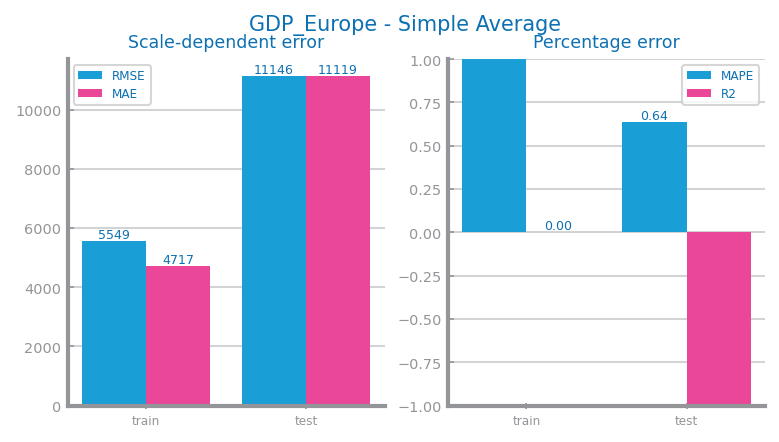

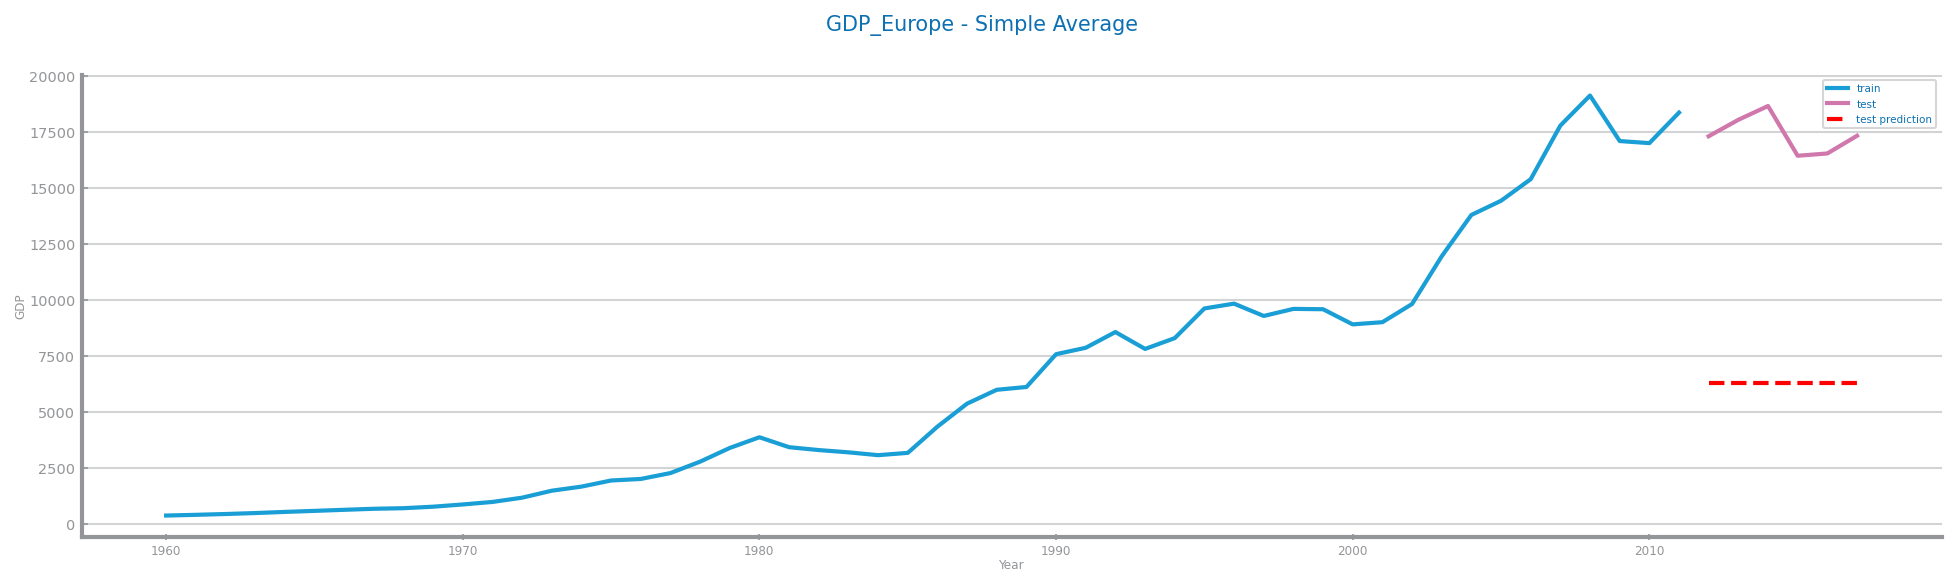

In [7]:
from dslabs_functions import plot_forecasting_eval, plot_forecasting_series
from matplotlib.pyplot import savefig

# Evaluate the forecast
plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Simple Average")


# Visualize the forecast
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Simple Average",
    xlabel=timecol,
    ylabel=target,
)
